# Week 07, Part 1

### Topic
 1. Foundations for Inference
 1. BACK TO SLIDES FOR WHEN TO USE SAMPLE MEANS


In [19]:
# resize
require(repr)
options(repr.plot.width=4, repr.plot.height=4)

## 1. Foundations for inference

Load the fish dataset from week02:

In [20]:
fishdata = read.csv('../week02/undata_fish_2020.csv')

Take the log of the trade in USD, like before:

In [21]:
log_trade_usd = log10(fishdata$Trade..USD.)

A quick histogram to remind ourselves what this data looks like:

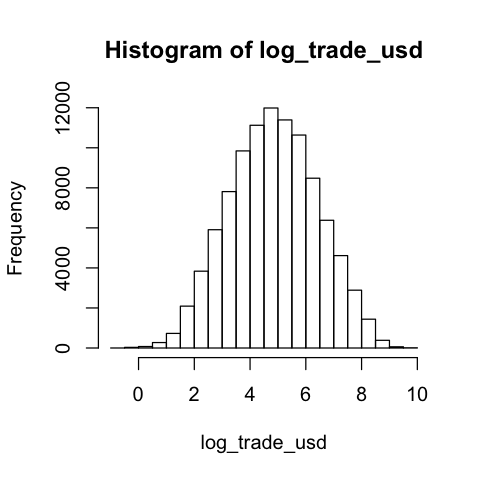

In [22]:
hist(log_trade_usd)

Now, let's assume this distribution is a measurement of the population.  I.e., this dataset represents all of the trade of fish all over the globe.  In reality, it is itself a sample, of which we don't really know the data collection methods, but lets suspend our disbelief for the moment.

Let's pretend we are going out and collecting a random sample of the trade (in units of log10) of fish in the world.  We are asking over random years, countries, and import or export - what is the dollar value of the transaction?  In short - we are *sampling* from this background population.

Let's create a "mock" sample from our "mock" population data:

In [23]:
nsamples = 10 # Let's start with 10 random samples.

Next, we'll pull randomly using our "sample" function we used last week:

In [24]:
mysample = log_trade_usd[sample(1:length(log_trade_usd), nsamples, replace=FALSE)]

Here, we are using sample to pull random *indices* that run the length of the log_trade_usd vector - a total of nsamples.

In [25]:
print(sample(1:length(log_trade_usd), nsamples, replace=FALSE))

 [1] 19177 85795 76784 47811 12039 19971 24100 45718 95158 92126


In [26]:
print(mysample)

 [1] 4.530750 2.607455 4.420368 1.579784 4.592976 2.795880 3.697229 3.828338
 [9] 1.491362 2.999565


In opposition to last week we will be setting `replace=FALSE`.  This last part just means "sampling without replacement" so we don't double count indicies.

 Let's print out the mean of our sample and compare this to the mean of our "mock" population:

In [27]:
print('Sample Mean,   Population Mean')
print(c(mean(mysample), mean(log_trade_usd)))

[1] "Sample Mean,   Population Mean"
[1] 3.254371 4.849986


Note: if I run this a few times with different random samples, I get different means for my sample. **RUN A FEW TIMES ON YOUR OWN**

Some questions we might have at this point:
  * So, the means are close, but are they close enough? 
  * How to quantify how "close" or "far away" they are?

Let's try to see how good our means are by taking a bunch of samples and calculating their means.  We'll store these in a vector of "sample means":

In [28]:
mymeans = c() # where the sample means are stored
nmeans = 5 #start with 5 samples -> 5 sample means

Use sample function to generate samples of length nsamples (10), take the mean of these, and store it in our sample mean vector.  Do this nmeans times:

In [29]:
for (i in 0:nmeans){
  # grab the sample like before
  mysample = log_trade_usd[sample(1:length(log_trade_usd), nsamples, replace=FALSE)]
  # take the mean and store it:
  mymeans = append(mymeans, mean(mysample))
}

Let's make a histogram of these means - this is refered to as our "sampling distribution" in the book:

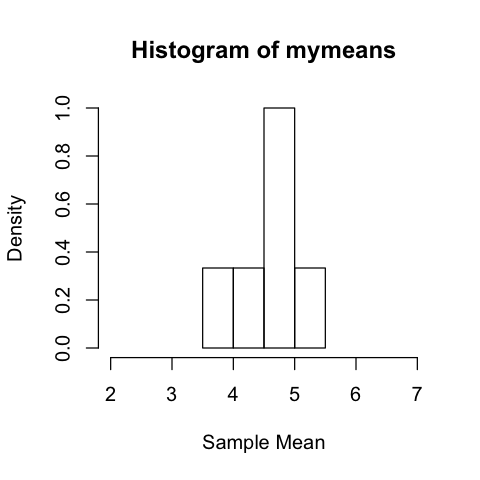

In [30]:
hist(mymeans, xlab="Sample Mean", prob=TRUE, xlim=c(2,7))

We'll overplot the actual population mean as well:

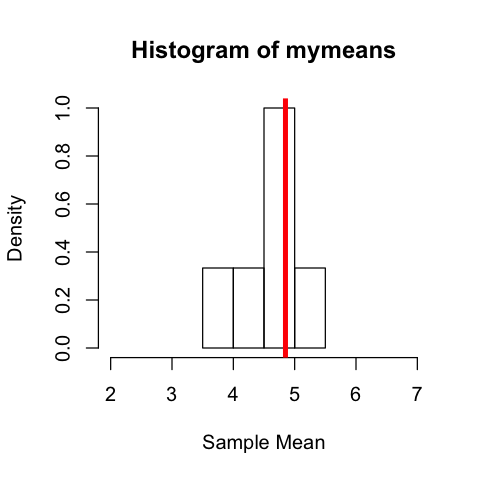

In [31]:
hist(mymeans, xlab="Sample Mean", prob=TRUE, xlim=c(2,7))
abline(v=mean(log_trade_usd), col="red", lwd=4) # population mean

If we start with nmeans = 5, i.e. a sample of means with only 5 measurements, we see a lot of variablity if we run this a few times.  **RUN A FEW TIMES ON YOUR OWN**

What if we change nmeans to 50? 500? 5000?

Q: What do we expect to see?  How will our histogram change?

*Take a moment to answer this on your own*

We see our collection of means is clustered around our population mean and that this clustering gets "tighter" if we increase the number of samplings that we do.

But how can we quantify how "good" our distribution of means is based on the number of sample means we take?

Enter the *standard error*!


**Standard Error** - first a calculation:

In [32]:
SE = sd(log_trade_usd)/nsamples**0.5

Don't worry,we'll talk about this equation in a few minutes.

Here we are calculating the Standard Error based on the population.  Let's overplot the theoretical spread on our sample mean distribution based on the mean of our population and the standard error of the population:

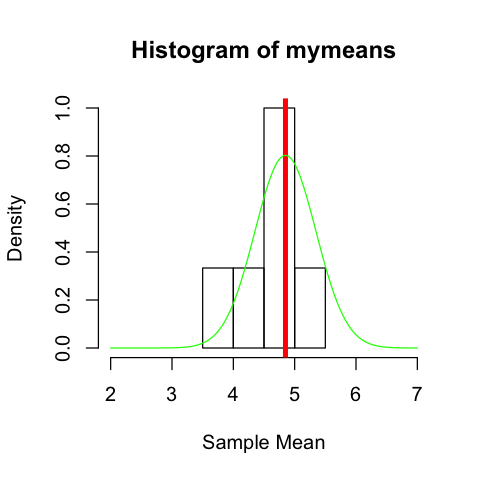

In [33]:
hist(mymeans, xlab="Sample Mean", prob=TRUE, xlim=c(2,7))
abline(v=mean(log_trade_usd), col="red", lwd=4) # population mean

x = seq(2,7, length=200)
lines(x, dnorm(x, mean=mean(log_trade_usd), sd=SE), col="green")

Here, we've overplotted how much we *think* the means should vary from the true, population, mean. We notice that our simulated distribution of sample means lines up nicely with our theoretical.  We can see that this is true when we change our the size of our samples (nsamples) **GO BACK AND DO ON YOUR OWN**

Often, don't know anything about the population, only have the sample.  Also, we often just have the *one* sample, not a whole bunch where we can calculate the distribution of means.  What do we do then? In this case, we can get a handle on how much we *estimate* the mean should vary by using the standard deviation of the values measured in our *sample* instead of the population:

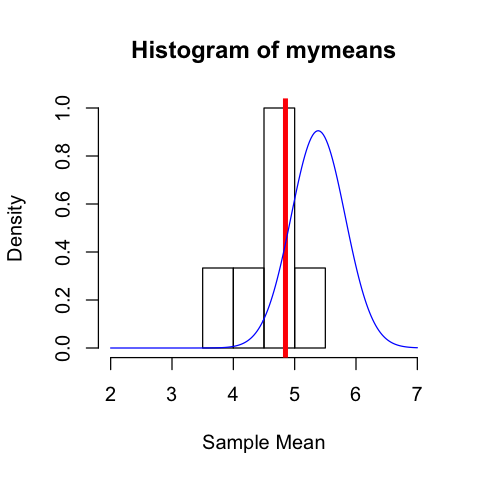

In [34]:
hist(mymeans, xlab="Sample Mean", prob=TRUE, xlim=c(2,7))
abline(v=mean(log_trade_usd), col="red", lwd=4) # population mean

SE_estimate = sd(mysample)/nsamples**0.5
lines(x, dnorm(x,mean=mean(mysample), sd=SE_estimate), col="blue")

Again, the Standard Error using the sample SD is close to the population measurement, but not exact. 

Let's summarize these things a bit more and get a handle on how the Standard Error is used.

## 2. BACK TO SLIDES FOR WHEN TO USE SAMPLE MEANS
